# Lab 4: Logistic Regression


## Load Modules, Data. Inspect Data


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random

random.seed(10)

X, y = datasets.load_breast_cancer(return_X_y=True)
print("#samples: {}, #features: {}".format(X.shape[0], X.shape[1]))

#samples: 569, #features: 30


## Preprocessing


In [12]:
# Check for missing values 
print(np.isnan(X).sum()/X.shape[0]) 
print(np.isnan(y).sum()/y.shape[0]) # no missing values 

# No categorical features as the data is in a ndarray implying no non-numeric types 
for i in range(X.shape[1]):
    print(f"Col. {i}: {X[:i].dtype}")

print("Data Type of y:", y.dtype)

0.0
0.0
Col. 0: float64
Col. 1: float64
Col. 2: float64
Col. 3: float64
Col. 4: float64
Col. 5: float64
Col. 6: float64
Col. 7: float64
Col. 8: float64
Col. 9: float64
Col. 10: float64
Col. 11: float64
Col. 12: float64
Col. 13: float64
Col. 14: float64
Col. 15: float64
Col. 16: float64
Col. 17: float64
Col. 18: float64
Col. 19: float64
Col. 20: float64
Col. 21: float64
Col. 22: float64
Col. 23: float64
Col. 24: float64
Col. 25: float64
Col. 26: float64
Col. 27: float64
Col. 28: float64
Col. 29: float64
Data Type of y: int32


<BarContainer object of 2 artists>

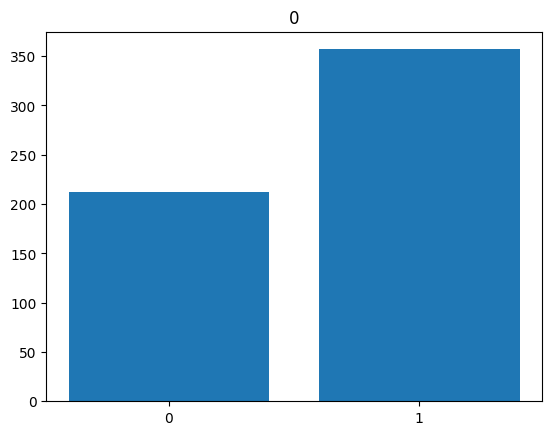

In [32]:
# Checking for balance of data
# import pandas as pd 
# yInspect = pd.DataFrame(y)
# yInspect.hist(grid=False, bins=10) # cant do without pandas

# ^^^^^ one ugly method of visualizing # of 1's and 0's ^^^^

# this method is more verbose, but more visually pleasing. 
import matplotlib.pyplot as plt 

zeros = np.count_nonzero(y == 0)
ones = np.count_nonzero(y == 1)
values = [zeros, ones]

plt.bar(['0','1'],values)

# Data is relatively balanced, meaning accuracy can be used to measure performance 

## Split and Normalize Features


In [42]:
# Splitting data

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size= 0.12, random_state=2)

print("training values {}, testing values {}".format(X_train.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

training values 500, testing values 69


## Train Log. Reg. model and Select Best Hyperparameter

In [43]:
# 10 fold cross-validation
folds = 10

# total number of training samples
num_train_val = X_train_val.shape[0]

#shuffleing indices of samples to remove potential ordering bias
sample_idx = np.arange(num_train_val)
shuffle(sample_idx)

print(sample_idx.shape)

# splitting indices into 10 folds
folds_idx = sample_idx.reshape(folds, -1)
print('index of folds', folds_idx)

# set of hyperparameters to be tested
regTerms = [.00001, .0001, .001, .01, .1, 1, 10, 20, 50, 100]

best_acc = 0.0
best_reg = 0.0

for reg in regTerms:
    
    # 10-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = folds_idx.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
     
        # training set
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        # validation set
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        # build the model with different hyperparameters
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
print('best_acc', best_acc, 'best_reg', best_reg)


(500,)
index of folds [[448  44 464 385 430 488 110 496 408 165 118 206 423  52  94 177 228 286
  262  11 210 321  49 404 217 328  31 248 209 341 401 112 135 263 387 102
  394 447 458 123  74 386 273 187  42  10 287 427 380 481]
 [272 259  71 172 219 349 466 308 242 167 143 332 335 455 203 360 392 222
  351 193 391 431 446 132 133 246 324 473 129  20 315 125 383 467 374 130
   51  70 339 170 176 415 352 270 145 166 389 395 108 313]
 [424 103 113 232 309  55 358  37 134 305 300 158  61 152 107 372 301  29
  357 365 312 353  41 225 122 195 268 234 399  50  26 255 201  66 127 282
  434  60 105 258 267 407  47 470  95 197  21 224 216 354]
 [403 346  16   5 111 275  63 456 329 205 183 396 444 115 233 106 202 410
  478 215 200  48 322  32 338 204 479 317 350 100 162 185 168  97 319 454
  495 416 426 137 230 280  69   7 146  33 337 256 182 449]
 [413 438  72 252 314 468  78 163  13  80 421  92 190 347 441  88 271  43
  381 363 238 169 278  83  12   9 342 418 362 212 296 179 406 213 376  17
  

c:\Users\Tanner_N\AppData\Local\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Tanner_N\AppData\Local\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

reg_coeff: 0.05, acc: 0.972


c:\Users\Tanner_N\AppData\Local\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Tanner_N\AppData\Local\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

reg_coeff: 0.02, acc: 0.968
reg_coeff: 0.01, acc: 0.966
best_acc 0.9780000000000001 best_reg 0.1


c:\Users\Tanner_N\AppData\Local\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Tanner_N\AppData\Local\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l